In [1]:
import ReadData as rd

import gzip
from collections import defaultdict
import pandas as pd
from wordcloud import STOPWORDS, WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict

from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
import numpy as np

from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
import nltk
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize

from pandas.io.json import json_normalize


reviewFile="dataset/reviewShuffled.json"
businessFile="dataset/business.json"
userFile="dataset/user.json"

In [5]:
def getRestaurantBusinesses():
    bdata=rd.readData(fileName=businessFile,breakCondition=10000000)
    businessSet=[]
    bData=[]
    for b in bdata:
        bid,categoryList=b['business_id'],b['categories']
        if 'Restaurants' in categoryList:
            bData.append(b)
            businessSet.append(bid)
#     bdata=pd.DataFrame(bData,index=businessSet)
    return bData,businessSet

def getGeographicalRestaurants(bdata,businessSet,state="AZ"):
    bData=pd.DataFrame(bdata,index=businessSet)
    stateBusinesses=bData[bData.state==state]
    return stateBusinesses

def getRestaurantReviews(reviewdata,businessSet):
    businessSet=set(azData.business_id)    
    print("Data Loaded")
    data=[]
    for d in reviewdata:
        bid=d['business_id']
        if bid in businessSet:
            data.append(d)
    print(len(data))
    return data



In [6]:
reviewdata=rd.readData(fileName=reviewFile,breakCondition=5000000)

Data Loaded
Total Data:  4736897


In [7]:
bdata,businessSet=getRestaurantBusinesses()
len(bdata),len(businessSet)

Data Loaded
Total Data:  156639


(51613, 51613)

In [64]:
totalbusDF=pd.DataFrame(bdata,index=businessSet)

In [144]:
totalbusDF[totalbusDF.state=="ON"].count(),totalbusDF[totalbusDF.state=="AZ"].count()

(address         12634
 attributes      12634
 business_id     12634
 categories      12634
 city            12634
 hours           12634
 is_open         12634
 latitude        12634
 longitude       12634
 name            12634
 neighborhood    12634
 postal_code     12634
 review_count    12634
 stars           12634
 state           12634
 dtype: int64, address         10219
 attributes      10219
 business_id     10219
 categories      10219
 city            10219
 hours           10219
 is_open         10219
 latitude        10219
 longitude       10219
 name            10219
 neighborhood    10219
 postal_code     10219
 review_count    10219
 stars           10219
 state           10219
 dtype: int64)

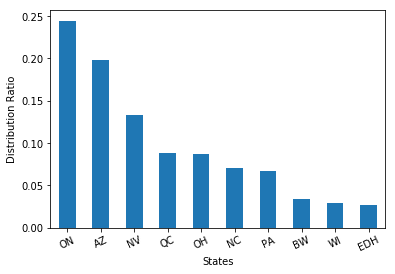

In [157]:
# totalbusDF["state"].value_counts()
# for i in totalbusDF["state"]:
#     print(i,i.value_counts())

# CountStatus = pd.value_counts(totalbusDF['state'].values,sort=True)
# print(CountStatus)
# CountStatus.plot.barh()
# pd.value_counts(totalbusDF['state']).plot.bar()
s2 = pd.Series([i for i in totalbusDF['state']])
prob = s2.value_counts(normalize=True)
threshold = 0.02
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
# prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Distribution Ratio')
plt.xticks(rotation=25)
plt.savefig("Plots/stateRestaurantDistribution.pdf",format="pdf")
plt.show()


In [154]:
# stateRatings = pd.crosstab(index=totalbusDF["state"], 
#                           columns=totalbusDF["stars"])
stateRatings = pd.crosstab(index=totalbusDF["stars"],columns="Count")

stateRatings

col_0,Count
stars,
1.0,314
1.5,969
2.0,2689
2.5,5108
3.0,9434
3.5,12747
4.0,12922
4.5,6064
5.0,1366


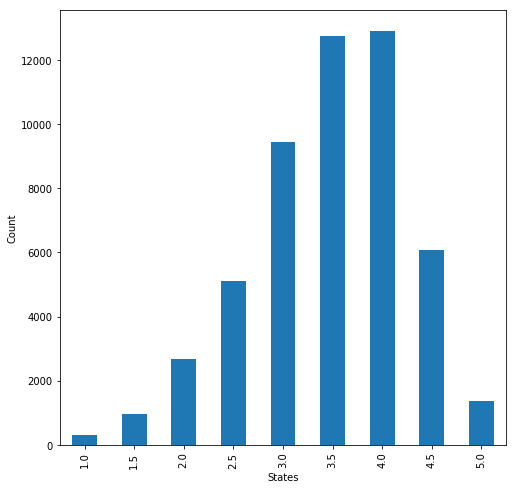

In [162]:
stateRatings.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True,legend=None)
plt.xlabel('States')
plt.ylabel('Count')
# plt.legend.remove()
plt.savefig("Plots/ratingStateWise3.pdf",format="pdf")
plt.show()

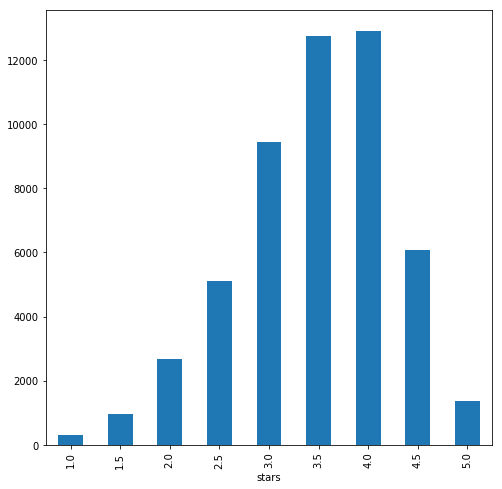

In [163]:
stateRatings.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True,legend=None)

plt.savefig("Plots/overallBusinessrating4.pdf",format="pdf")
plt.show()

In [75]:
test=totalbusDF.groupby('state')['stars'].value_counts()
test

state  stars
01     3.5         4
       3.0         1
       4.5         1
3      5.0         1
ABE    4.5         1
AZ     4.0      2574
       3.5      2440
       3.0      1827
       2.5      1139
       4.5      1093
       2.0       618
       1.5       234
       5.0       222
       1.0        72
BW     4.0       515
       3.5       395
       4.5       329
       3.0       256
       2.5       108
       5.0       107
       2.0        35
       1.5         8
       1.0         6
BY     3.0         1
       3.5         1
       5.0         1
C      3.5         8
       4.0         5
       3.0         3
       4.5         3
                ... 
SC     4.0        38
       2.5        23
       4.5        20
       2.0        15
       1.5         7
       5.0         6
       1.0         2
ST     2.5         1
       3.5         1
       4.5         1
       5.0         1
WA     3.0         1
WHT    3.0         1
WI     4.0       403
       3.5       367
       3.0       272


In [ ]:
azData=getGeographicalRestaurants(bdata,businessSet,state="AZ")
# print(bdata[:1])
print(len(bdata),len(azData))

In [ ]:
data=getRestaurantReviews(reviewdata,azData)

In [ ]:
trainData=data[:200000]
reviewDataDF=pd.DataFrame(trainData)

In [ ]:
stop=set(stopwords.words('english'))
stop.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}'])
def get_stop_removed(x):
    return [i.lower() for i in wordpunct_tokenize( "".join(x.tolist())) if i.lower() not in stop]

In [ ]:
reviewDataDF[:100]

In [ ]:
rating5Stars=get_stop_removed(reviewDataDF[reviewDataDF['stars']==5]['text'])
rating1Stars=get_stop_removed(reviewDataDF[reviewDataDF['stars']==1]['text'])

In [ ]:
def cloud_plot(wordcloud):
#     fig = plt.figure(1, figsize=(20,15))
    plt.figure( 1,figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis('off')
#     plt.tight_layout(pad=0)
#     plt.savefig("5StarWordCloud",format="pdf")
    plt.savefig('1StarWordCloud', format="pdf", bbox_inches='tight')
    plt.show()





In [ ]:
wordcloud_rep=WordCloud(
                          background_color='white',
                          stopwords=set(STOPWORDS),
                          width=3200, 
                          height=1600,
                          max_words=2000,
                          max_font_size=400, 
                          random_state=1705
                         ).generate(" ".join(rating5Stars))


In [ ]:
wordcloud_rep=WordCloud(
                          background_color='white',
                          stopwords=set(STOPWORDS),
                          width=3200, 
                          height=1600,
                          max_words=2000,
                          max_font_size=400, 
                          random_state=1705
                         ).generate(" ".join(rating1Stars))



In [ ]:
cloud_plot(wordcloud_rep)

In [ ]:
x,y = [],[]
y.append (azData.stars)
x.append (azData.review_count)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y,x,'o-')
ax.set_xlabel("Review Count")
ax.set_ylabel("Rating")
plt.show()



In [ ]:

wordcloud_rep=WordCloud(
                          background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(" ".join(resp_republican))

In [ ]:
bdata=rd.readData(fileName=businessFile,breakCondition=10000000)
print(bdata[:1])
# print(len(bdata))
bdata[:1]

In [ ]:
bDF=pd.DataFrame(bdata)

In [ ]:
bDF['stars'].value_counts()

In [ ]:
categoryDict=defaultdict(int)
businessSet=set()
bData=[]
for b in bdata:
    bid,categoryList=b['business_id'],b['categories']
    if 'Restaurants' in categoryList:
        bData.append(b)
        businessSet.add(bid)
print(len(bdata))
bdata=bData
bData=[]
print(len(bdata),len(businessSet))

In [ ]:
# jsonFile=rd.json.load(businessFile)
df = json_normalize(bdata)



In [ ]:
df=df*1
df=df.fillna(0)

In [ ]:
df=df.drop(['business_id','postal_code','city','categories','address','is_open','latitude','longitude','name','neighborhood','state'], axis=1)



In [ ]:
for d in df.columns:
    if 'hours' in d:
        df=df.drop([d],axis=1)
        

In [ ]:
for d in df.columns:
    print(df[d].value_counts())
    


In [ ]:
delColList=[]
for d in df.columns:
#     print(df[d].value_counts())
    valList=[]
    for val in df[d].value_counts():
#         print("val= ",val)
        valList.append(int(val))
    valList.sort()
    valList.reverse()
    if valList[0]==0:
        delColList.append(d)
        break
    if len(valList)>1:
        num=valList[1]/valList[0]
#         print(num, " :num")
    if num<0.2:
        delColList.append(d)
#     break
delColList=set(delColList)
for d in df.columns:
    if d in delColList:
        df=df.drop([d],axis=1)



In [ ]:
sLength = len(df['a'])
df1 = df1.assign(e=p.Series(np.random.randn(sLength)).values)

In [ ]:
df=pd.get_dummies(df,columns = ['attributes.Alcohol','attributes.NoiseLevel','attributes.RestaurantsPriceRange2','attributes.WiFi'] )

In [ ]:
df[:10]

In [ ]:
df[:10]

In [ ]:
df.columns = df.columns.map(lambda x: x.split(".")[-1])


In [ ]:
categoryDict=defaultdict(int)
businessSet=set()
bData=[]
for b in bdata:
    bid,categoryList=b['business_id'],b['categories']
    if 'Restaurants' in categoryList:
        bData.append(b)
        businessSet.add(bid)
print(len(bdata))
bdata=bData
bData=[]
print(len(bdata),len(businessSet))

In [ ]:
bdata[99:100]

In [ ]:
bdData = pd.DataFrame(bdata)

In [ ]:
bData[:1]

In [ ]:
len(bdData)

In [ ]:
# bdData["state"].value_counts()

In [ ]:
x=[[1,2,3,4],[2,5,1,2]]

In [ ]:
y = pd.DataFrame(x,index=['g','d'])

In [ ]:
y.columns=['a','aa','b','c']

In [ ]:
y

In [ ]:
for i in range(0,y.shape[0]):
    y.iloc[i]['a']+=2
print(y.loc['g'])

In [ ]:
y.loc['g']

In [ ]:
type(y.loc['g'])
var=y.loc['g']
p=1.5
q=4.5
p1=pd.Series([p])
var=var.append(p1)
var=var.rename({0: 'p'})
y.loc['g']=var
var
# list(var)

In [ ]:
featMat=pd.DataFrame(columns=['a','b','c'])

In [ ]:
df = pd.DataFrame([[1,2,3]], columns=['a','b','c'])
featMat=featMat.append(df)
featMat

In [ ]:
y.to_csv("dataset/DF.csv", encoding='utf-8', index=False)

In [ ]:
for i in y:
    print(i)
y

In [ ]:
y

In [ ]:
y

In [ ]:
y.columns=['a','aa','b','c']
y.rows=['x','y']

In [ ]:
y

In [ ]:
rawdata=rd.readData(fileName=reviewFile,breakCondition=5000000)
data=[]
for d in rawdata:
    bid=d['business_id']
    if bid in businessSet:
        data.append(d)
print(len(data))
rawdata=[]

In [ ]:
data[:1]

In [ ]:
data[:1]
print(len(data))

In [ ]:
businessSet=set()
for d in data[:200000]:
    bid=d['business_id']
    businessSet.add(bid)
print(len(businessSet))
    

In [ ]:
data=rd.readData(fileName=reviewFile,breakCondition=50000)

In [ ]:
nounList=[]
count=0
for d in data:
    tagged_text = nltk.pos_tag(d['text'])
    for word, tag in tagged_text:
        if tag in ["NN", "NNS"]:
            nounList.append(word)
    count+=1
    if(count%1000==0):
        print(count)


In [ ]:
nounList

In [ ]:
data=rd.readData(fileName=reviewFile,breakCondition=100000)

In [ ]:
bdata=rd.readData(fileName=businessFile)

In [ ]:
udata=rd.readData(fileName=userFile)

In [ ]:
tData=data[:10]
businessSet=[]
for d in tData:
    businessSet.append(d['business_id'])
businessSet=set(businessSet)
len(businessSet)

In [ ]:
tData

In [ ]:
rData=pd.DataFrame(tData)
tokenizer = RegexpTokenizer(r'\w+')
en_stop = get_stop_words('en')
en_stop=set(en_stop)
en_stop.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}'])
p_stemmer = PorterStemmer()

In [ ]:
latentFactor=5
texts=[]
for b in businessSet:
    for d in rData[rData.business_id==b]['text'].values:
        d=d.lower()
        tokens = tokenizer.tokenize(d)
        stopped_tokens = [i for i in tokens if not i in en_stop]
#         stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        lemm_tokens = [lemm.lemmatize(i) for i in stopped_tokens if(len(i)>2)]
        texts.append(lemm_tokens)


In [ ]:
dictionary = corpora.Dictionary(texts)

In [ ]:
corpus = [dictionary.doc2bow(t) for t in texts]

In [ ]:
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=5, id2word = dictionary, passes=10)

In [ ]:
ldamodel.print_topics(num_topics=5, num_words=10)

In [ ]:
uMap = defaultdict(int)
iMap = defaultdict(int)
iCount=0
uCount=0
for i in tData:
    user, item = i['user_id'], i['business_id']
    if user not in uMap:
        uMap[user]=uCount
        uCount+=1
    if item not in iMap:
        iMap[item]=iCount
        iCount+=1
latentFactor=5
texts=[]
y_i=np.zeros((len(businessSet),latentFactor ))
# print(y_i)

for b in businessSet:
#     print(b)
    for d in rData[rData.business_id==b]['text'].values:
        d=d.lower()
        tokens = tokenizer.tokenize(d)
        stopped_tokens = [i for i in tokens if not i in en_stop]
#         stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        lemm_tokens = [lemm.lemmatize(i) for i in stopped_tokens if(len(i)>2)]
        bow = dictionary.doc2bow(lemm_tokens)
        topics=ldamodel.get_document_topics(bow)
        for topic,prob in topics:
            y_i[iMap[b]][topic]=prob
        print(topics)

print(y_i)
# for i in y_i:
#     print(i)
#         print((y_i[i][j]))

In [ ]:
for b in businessSet:
    print(rData[rData.business_id==b]['text'].values)